In [1]:
import pandas as pd

In [2]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')

In [3]:
#Os cincos primeiros:
dfClientes.head(5)
#Cinco últimos:
dfClientes.tail(5)
#Cinco aleatórios:
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
250,251,Anna Dias,F,6/13/2003
48,49,Rafael Melo,M,9/3/1972
999,1000,Gustavo Barbosa,M,12/30/1975
14,15,Gustavo Barbosa,M,4/19/1936
257,258,Gabrielle Barbosa,F,3/17/1967


In [4]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [5]:
#Chamando o DataFrame e utilizando de um filtro para ver todas as linhas com informações 'null':
dfClientes[dfClientes.isnull().T.any()]
#Esse 'T' vem de transposto, se não tiver isso não funciona... já que ele dirá somente se existe algum valor nul para cada
#coluna e não para cada linha...

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
#Verificando quais valores existem dentro de uma coluna:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [7]:
dfLojas
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<Axes: >

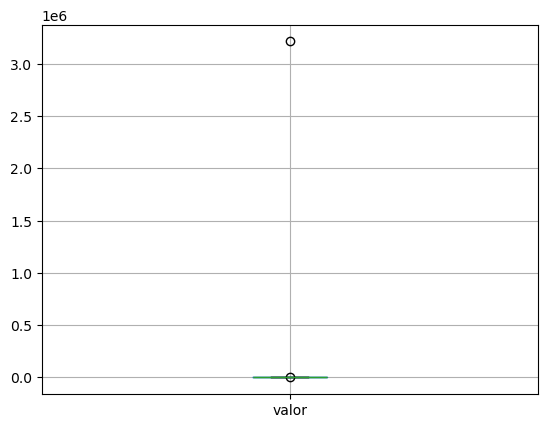

In [8]:
#Buscando visualizar se tem uma diferença muito descrepante de algum valor de dentro da tabela:
dfProdutos.boxplot(column = ['valor'])

In [9]:
#Criando um filtro para descobrir essa linha acima de 3milhões:
dfProdutos[dfProdutos.valor > 3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [10]:
#Utilizando o filtro do boxplot, podemos visualizar que ainda existe aum item sendo vendido por um preço muito diferente
#dos demais...
dfProdutos[dfProdutos.valor < 3000000].boxplot(column = ['valor'])

<Axes: >

In [11]:
#Antes de excluir o item que possui esse valor muito desproporcionou, é necessário que você certifique que ele ainda não
#foi vendido nenhuma vez:
dfVendas[dfVendas.id_produto == 10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
#Vendo a conistência da tabela Vendas:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [13]:
dfPagamentos.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN
